# Проверка гипотез. Тесты Спирмана, логистическая регрессия по количеству больниц и коечных мест

In [6]:
import pandas as pd
import numpy as np

In [16]:
X = pd.read_csv("final_X.csv").rename(columns={"Unnamed: 0" : "city"})
y = pd.read_csv("final_y.csv", header=None).rename(columns={0 : "city", 1 : "level"}).set_index("city")

In [17]:
y

,level
city,
Архангельск,28.129084
Астрахань,29.783378
Барнаул,44.720463
Белгород,22.837688
Биробиджан,35.555491
...,...
Челябинск,37.289467
Чита,3.136986
Южно-Сахалинск,31.055334


# Логистическая регрессия

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

X_bol = X[["bol_all", 'koyki_all']].values
lr = LogisticRegression()
lr.fit(X_bol, y > y.mean())
roc_auc_score(y > y.mean(), lr.predict_proba(X_bol)[:, 1])

/Users/anton/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7068965517241379

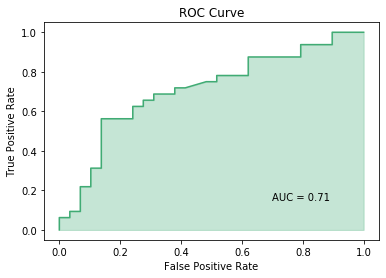

In [22]:
import matplotlib.pyplot as plt
a, b, c = roc_curve(y > y.mean(), lr.predict_proba(X_bol)[:, 1])
plt.plot(a, b, color=(0.25, 0.671875, 0.453125))
plt.fill_between(a, 0, b, color=(0.25, 0.671875, 0.453125, 0.3))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.text(0.7, 0.15, "AUC = 0.71" )
plt.title("ROC Curve")
plt.show()

# Spearman

In [26]:
from scipy.stats import spearmanr

rhos, pvals = [], []
res = []
for col in X.columns:
    rho, pval = spearmanr(y, X[col].values)
    rhos.append(rho)
    pvals.append(pval)
    res.append([rho, pval])

In [28]:
res_spe = pd.DataFrame(data=res, columns=["rho", "pval"], index=list(X.columns))
res_spe.sort_values(by="pval")

,rho,pval
lat,0.316023,0.013098
Миграционный прирост населения за 2017,-0.273536,0.032920
warm_temp_3,-0.272308,0.033746
2. Процент не раскрытых преступлений средней тяжести за 2017,-0.259718,0.043246
avg_temp,-0.249441,0.052543
...,...,...
bol_all,0.014286,0.912982
Процент бедных за 2017,0.011927,0.927308
Естественный прирост населения. Рождаемость за 2017,0.010057,0.938686
population,-0.008514,0.948077
